___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** Does the customer have a credit card or not?
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [8]:
churn_modelling = pd.read_csv("Churn_Modelling.csv")

In [9]:
df = churn_modelling.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.shape

(10000, 14)

In [14]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


<Axes: >

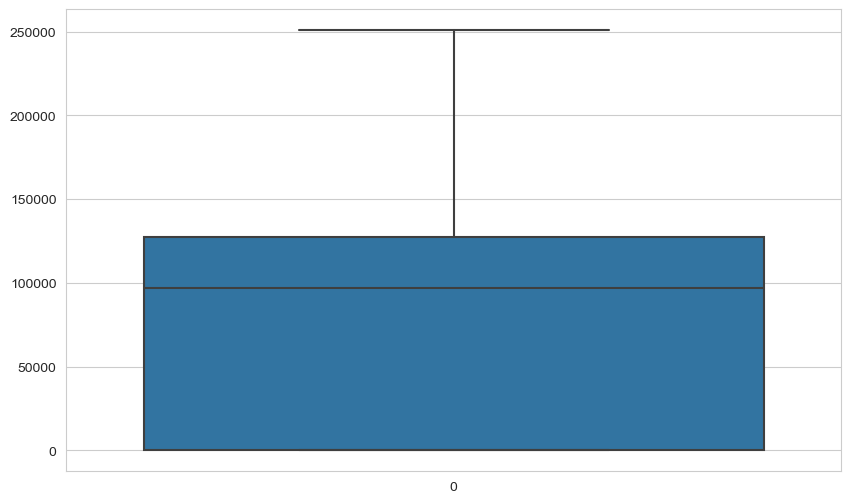

In [17]:
sns.boxplot(df["Balance"])

In [18]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [19]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

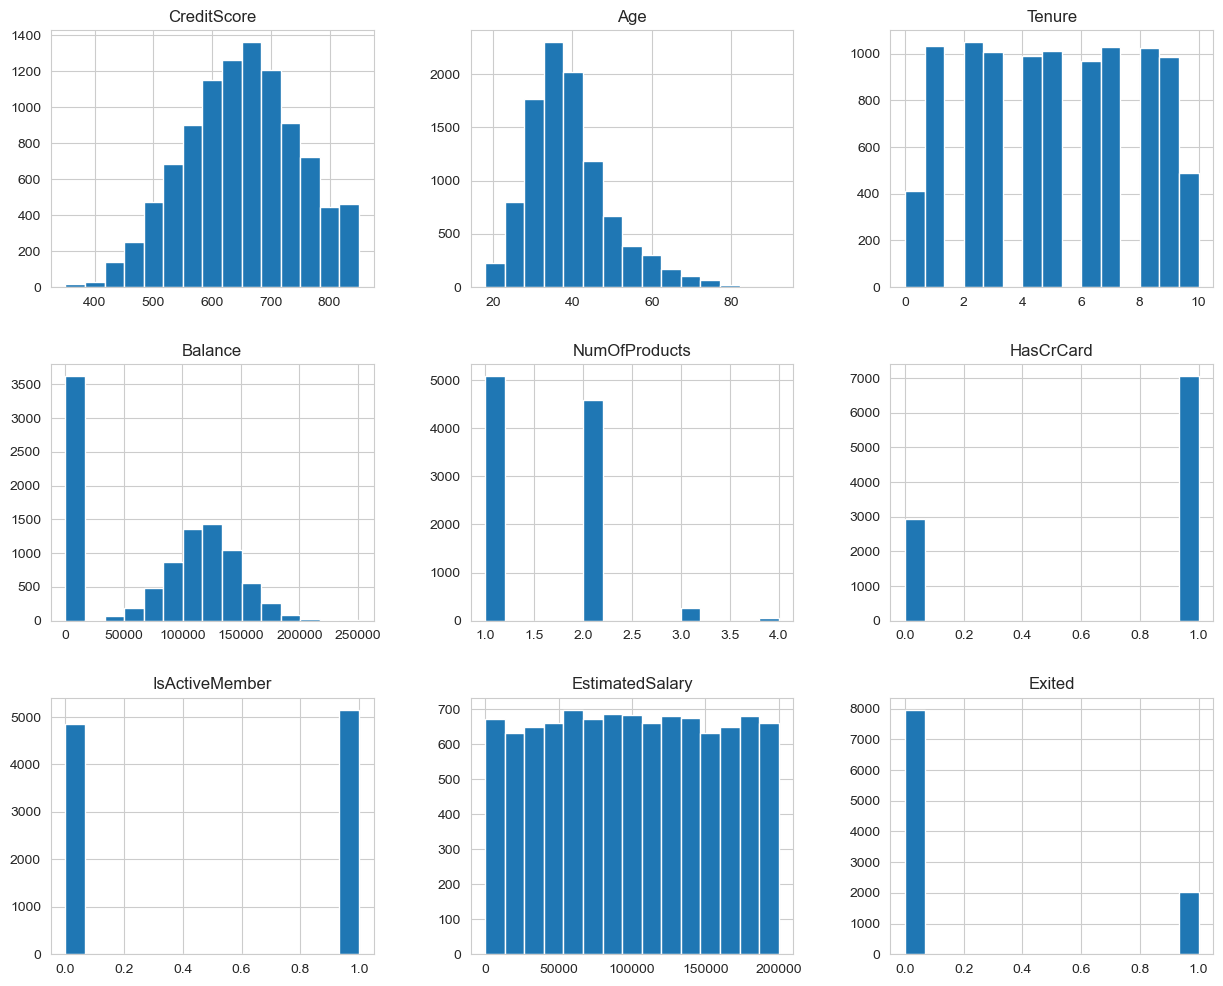

In [21]:
df.hist(figsize=(15,12), bins=15);

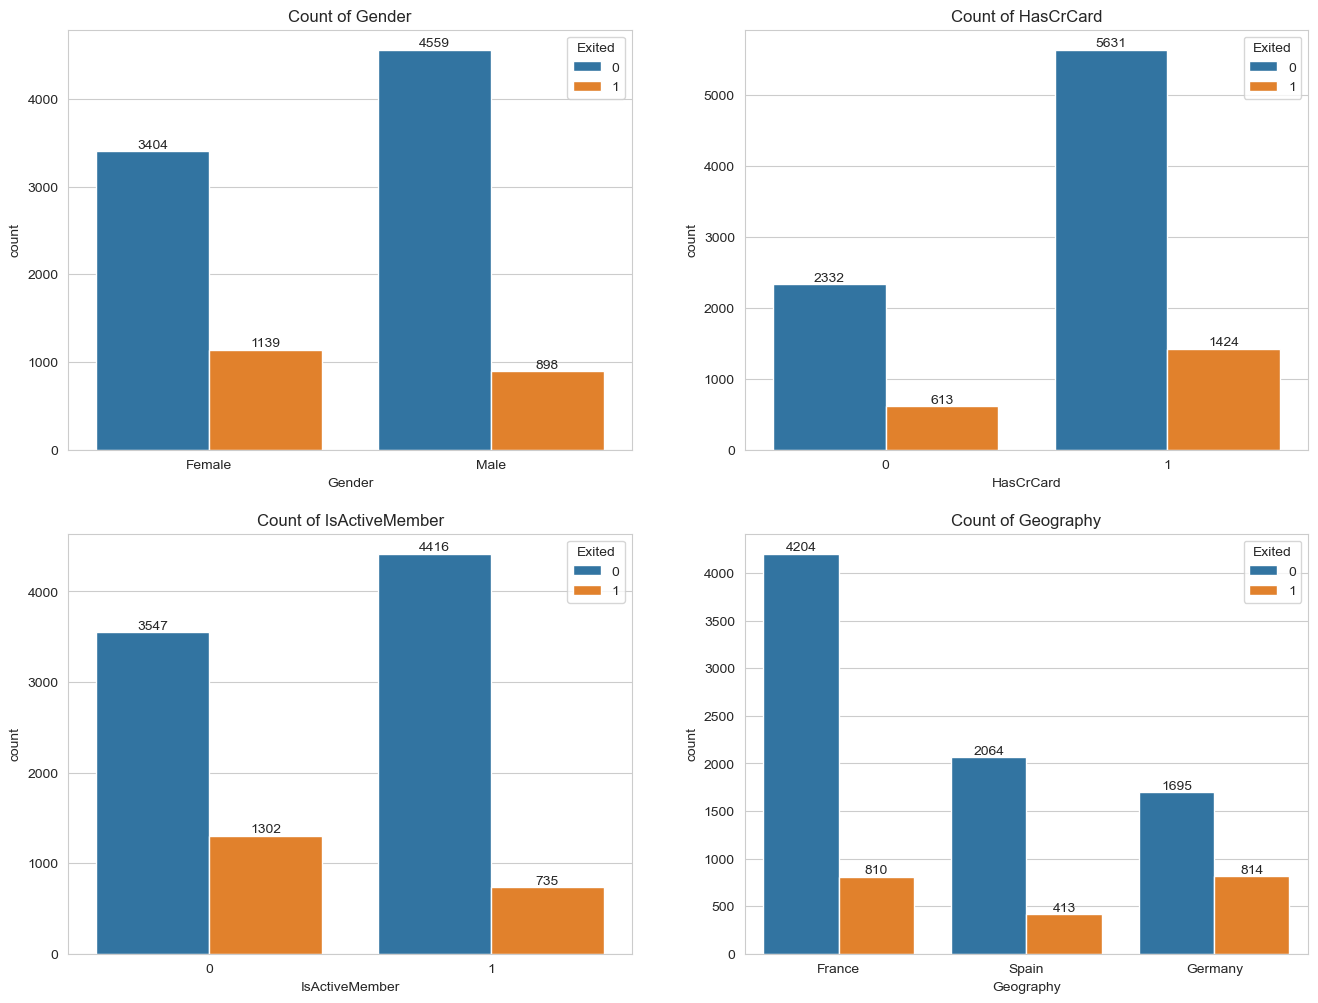

In [22]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    ax = sns.countplot(data = df, x = i, hue = "Exited")
    for k in ax.containers:
        ax.bar_label(k)
    plt.title(f"Count of {i}")

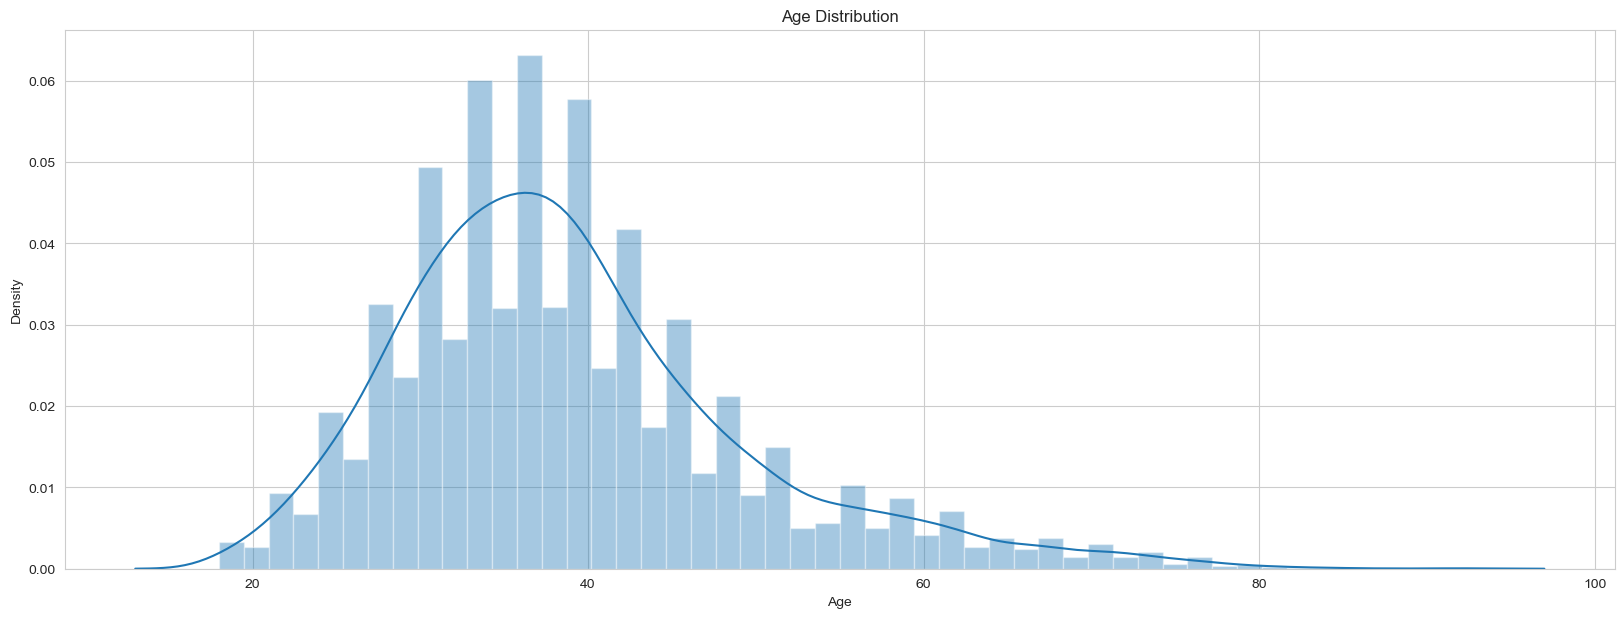

In [23]:
plt.figure(figsize=(20, 7))
sns.distplot(df["Age"])
plt.title("Age Distribution");

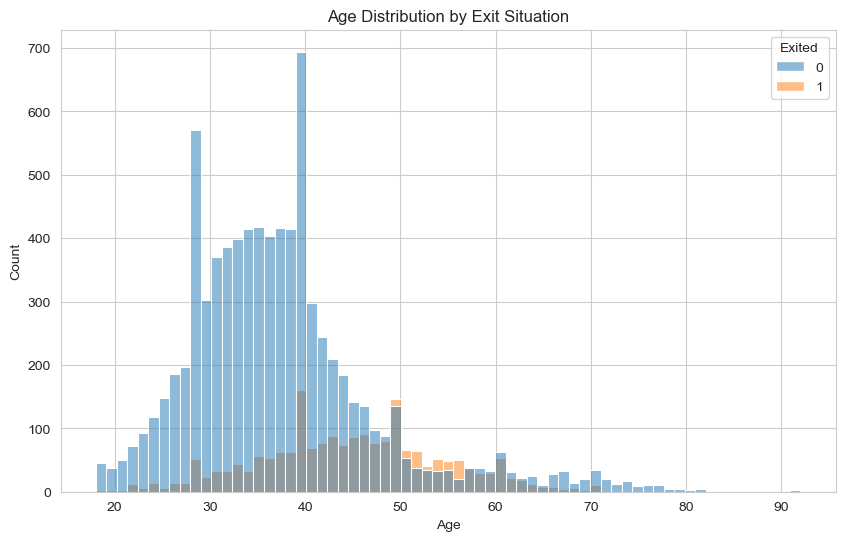

In [24]:
sns.histplot(data = df, x = "Age", hue = "Exited")
plt.title("Age Distribution by Exit Situation");

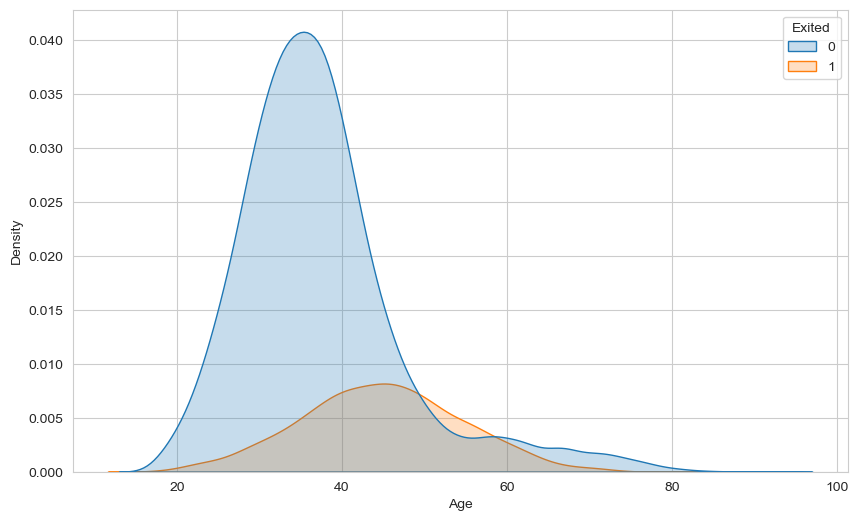

In [25]:
sns.kdeplot(data = df, x = "Age", hue = "Exited", fill = True);

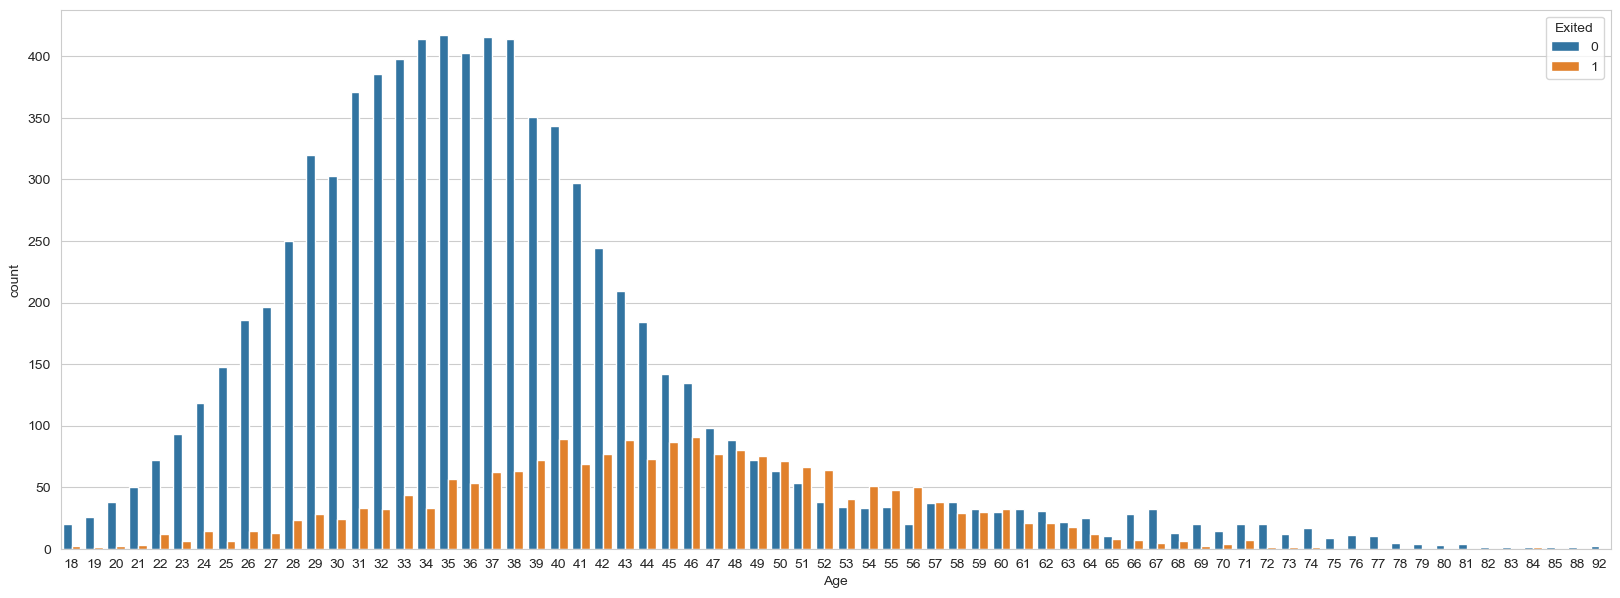

In [26]:
plt.figure(figsize = (20, 7))
sns.countplot(data = df, x = "Age", hue = "Exited");

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [28]:
# make_column_transformer kullanarak ColumnTransformer oluşturma
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), ["Geography", "Gender"]),
    remainder="passthrough"
)

# Veriyi dönüştürme
transformed_data = transformer.fit_transform(df)

# Yeni özellik adlarını alma
ohe = transformer.named_transformers_['onehotencoder']
ohe_feature_names = ohe.get_feature_names_out(['Geography', 'Gender'])

# Passthrough özelliklerin adlarını alma
passthrough_features = [col for col in df.columns if col not in ["Geography", "Gender"]]

# Özellik adlarını birleştirme
all_feature_names = list(ohe_feature_names) + passthrough_features

# Dönüştürülmüş veriyi DataFrame olarak yazdırma
df = pd.DataFrame(transformed_data, columns=all_feature_names)


In [29]:
df.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.000,0.000,0.000,1.000,0.000,619.000,42.000,2.000,0.000,1.000,1.000,1.000,101348.880,1.000
1,0.000,0.000,1.000,1.000,0.000,608.000,41.000,1.000,83807.860,1.000,0.000,1.000,112542.580,0.000
2,1.000,0.000,0.000,1.000,0.000,502.000,42.000,8.000,159660.800,3.000,1.000,0.000,113931.570,1.000
3,1.000,0.000,0.000,1.000,0.000,699.000,39.000,1.000,0.000,2.000,0.000,0.000,93826.630,0.000
4,0.000,0.000,1.000,1.000,0.000,850.000,43.000,2.000,125510.820,1.000,1.000,1.000,79084.100,0.000


# Preprocessing of Data
- Train | Test Split, Scalling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [32]:
seed = 42

In [33]:
X = df.drop(columns="Exited")
y = df["Exited"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.1, random_state = seed)
# Data'da imbalance durum olduğunu düşündüğümüz için stratify = y yaptık.

In [35]:
scaler = MinMaxScaler()

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [38]:
X_train.shape

(9000, 13)

## without class_weigth

### Create The Model

In [41]:
# Multi-line comment explaining the entire code
"""
This code defines a Sequential neural network model for binary classification.
The model architecture consists of:
- An input layer with 36 neurons
- Two hidden layers with 18 and 9 neurons respectively
- An output layer with 1 neuron for binary classification
All layers except the output use ReLU activation, while the output uses sigmoid.
The model is compiled with Adam optimizer and binary crossentropy loss function.
"""

# Initialize a Sequential model
model = Sequential()

# Add the input layer with 36 neurons and ReLU activation
# input_dim is set to the number of features in the training data
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))

# Add the first hidden layer with 18 neurons and ReLU activation
model.add(Dense(12, activation="relu"))

# Add the second hidden layer with 9 neurons and ReLU activation
model.add(Dense(6, activation="relu"))

# Add the output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Compile the model
# Use Adam optimizer, binary crossentropy loss, and accuracy as the metric
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [42]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 500, verbose = 1)
# Burada validation_split yerine validation_data = x_test, y_test de belirtebilirdik.

Epoch 1/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5558 - loss: 0.6788 - val_accuracy: 0.7989 - val_loss: 0.5353
Epoch 2/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8017 - loss: 0.5098 - val_accuracy: 0.7989 - val_loss: 0.4730
Epoch 3/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7935 - loss: 0.4839 - val_accuracy: 0.7989 - val_loss: 0.4543
Epoch 4/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7956 - loss: 0.4666 - val_accuracy: 0.7989 - val_loss: 0.4449
Epoch 5/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4579 - val_accuracy: 0.8200 - val_loss: 0.4311
Epoch 6/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8023 - loss: 0.4484 - val_accuracy: 0.8256 - val_loss: 0.4198
Epoch 7/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8124 - loss: 0.4371 - val_accuracy: 0.8367 - val_loss: 0.4090
Epoch 8/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8171 - loss: 0.4284 - val_accuracy: 0.8467 - v

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,165 (8.46 KB)

 Trainable params: 721 (2.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,444 (5.64 KB)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

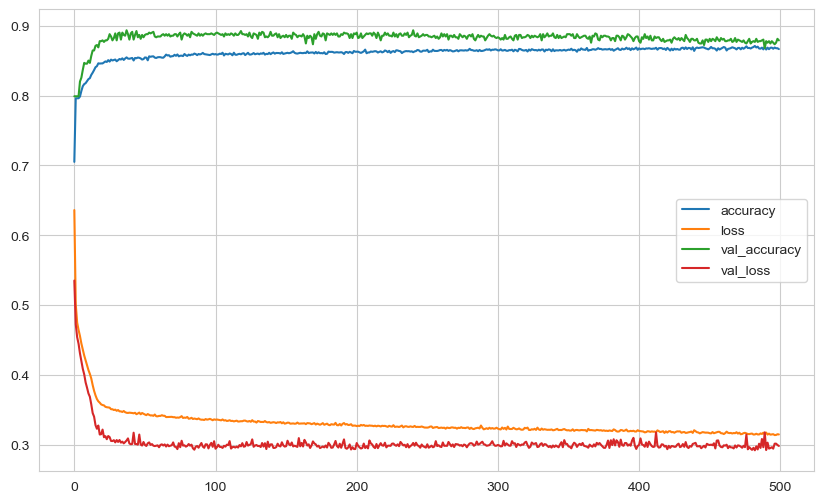

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, PrecisionRecallDisplay
from sklearn.model_selection import cross_validate

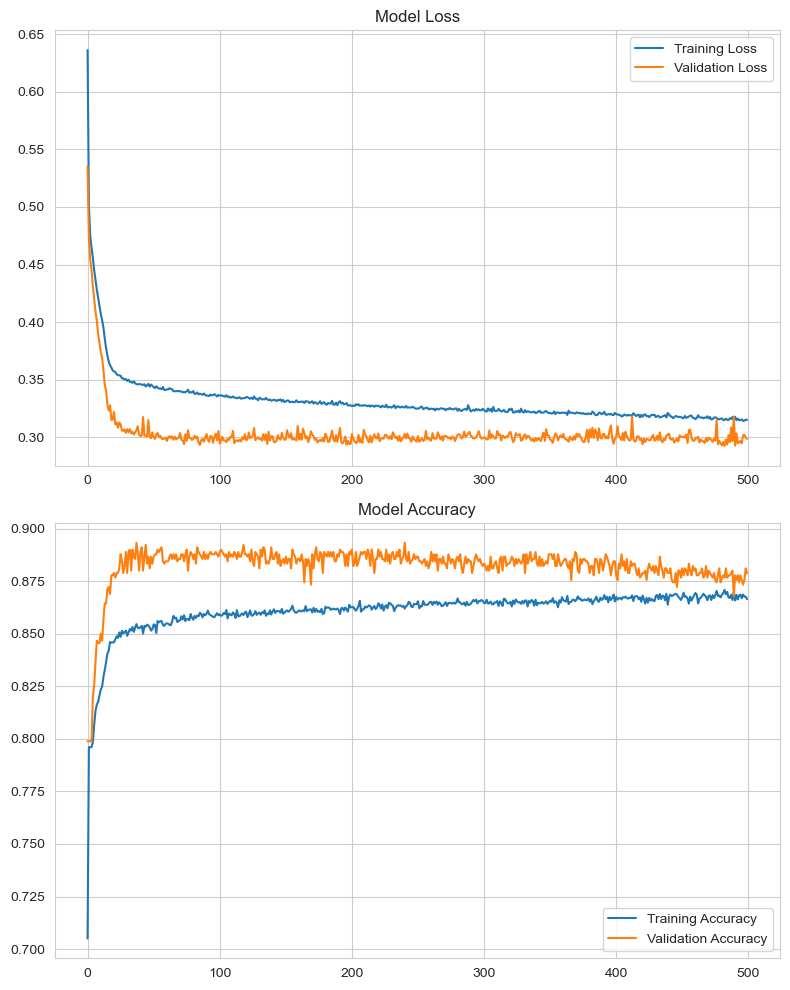

In [47]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss
axes[0].plot(loss_df["loss"], label="Training Loss")
axes[0].plot(loss_df["val_loss"], label="Validation Loss")
axes[0].set_title("Model Loss")
axes[0].legend()

# Plot accuracy
axes[1].plot(loss_df["accuracy"], label="Training Accuracy")
axes[1].plot(loss_df["val_accuracy"], label="Validation Accuracy")
axes[1].set_title("Model Accuracy")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [48]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Burada recall score'umuz target içi  0.49 çıkmış. Çok kötü. Demek ki datamızda kesinlikle imbalance durumu var.
# Bu yüzden class_weight kullanarak tekrar modelleyeceğiz.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[771  25]
 [114  90]]
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       796
         1.0       0.78      0.44      0.56       204

    accuracy                           0.86      1000
   macro avg       0.83      0.70      0.74      1000
weighted avg       0.85      0.86      0.85      1000



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step


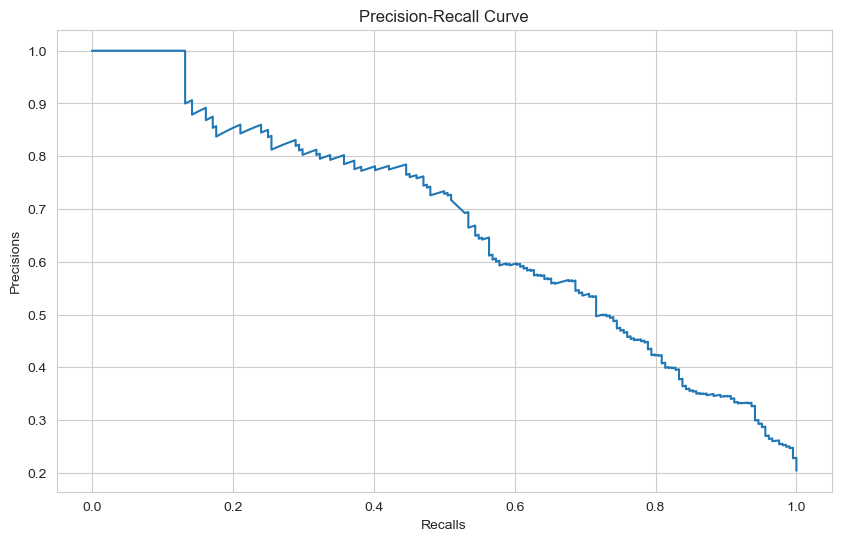

In [49]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

# Imbalance data durumunda Precision-Recall Curve üzerinden yorumlama yapıyoruz.

In [50]:
average_precision_score(y_test, y_pred_proba)

0.66741134582145

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
model2 = Sequential()
model2.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
model2.add(Dense(12, activation="relu"))
model2.add(Dense(6, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])
model2.fit(x=X_train, 
          y=y_train, 
          validation_data=0.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          class_weight=class_weights_dict)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


In [ ]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot();

In [ ]:
y_pred = model2.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = model2.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [ ]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model3 = Sequential()

model3.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model3.add(Dense(12, activation = "relu"))
model3.add(Dense(6, activation = "relu"))
model3.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
model3.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 1000, 
          verbose = 1, 
          class_weight = class_weights_dict)

64/64 [==============================] - 0s 1ms/step - loss: 0.3953 - recall: 0.8208 - val_loss: 0.4268 - val_recall: 0.7403
Epoch 468/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4010 - recall: 0.8033 - val_loss: 0.4608 - val_recall: 0.7845
Epoch 469/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4021 - recall: 0.8142 - val_loss: 0.4139 - val_recall: 0.7348
Epoch 470/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4014 - recall: 0.8130 - val_loss: 0.4744 - val_recall: 0.8011
Epoch 471/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3962 - recall: 0.8069 - val_loss: 0.5008 - val_recall: 0.8011
Epoch 472/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3991 - recall: 0.8093 - val_loss: 0.4588 - val_recall: 0.7735
Epoch 473/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3996 - recall: 0.8111 - val_loss: 0.4561 - val_recall: 0.7956
Epoch 474/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3949 - recall: 0.8130 - val_loss: 0.4493 - val_recall: 0.7624
Epoch 526/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3924 - recall: 0.8087 - val_loss: 0.4270 - val_recall: 0.7735
Epoch 527/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3962 - recall: 0.8069 - val_loss: 0.4537 - val_recall: 0.8066
Epoch 528/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3955 - recall: 0.8142 - val_loss: 0.5066 - val_recall: 0.7845
Epoch 529/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3939 - recall: 0.8166 - val_loss: 0.4771 - val_recall: 0.7956
Epoch 530/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3923 - recall: 0.8123 - val_loss: 0.4862 - val_recall: 0.8011
Epoch 531/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3960 - recall: 0.8190 - val_loss: 0.4134 - val_recall: 0.7459
Epoch 532/1000
64/64 [=============

64/64 [==============================] - 0s 2ms/step - loss: 0.3911 - recall: 0.8111 - val_loss: 0.4499 - val_recall: 0.7735
Epoch 584/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3895 - recall: 0.8160 - val_loss: 0.4238 - val_recall: 0.7624
Epoch 585/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3898 - recall: 0.8166 - val_loss: 0.4538 - val_recall: 0.7790
Epoch 586/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3891 - recall: 0.8105 - val_loss: 0.4258 - val_recall: 0.7348
Epoch 587/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3903 - recall: 0.8087 - val_loss: 0.4581 - val_recall: 0.7790
Epoch 588/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3899 - recall: 0.8178 - val_loss: 0.4163 - val_recall: 0.7569
Epoch 589/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3909 - recall: 0.8172 - val_loss: 0.4482 - val_recall: 0.7735
Epoch 590/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3885 - recall: 0.8214 - val_loss: 0.4645 - val_recall: 0.7680
Epoch 642/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3882 - recall: 0.8226 - val_loss: 0.4319 - val_recall: 0.7514
Epoch 643/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3912 - recall: 0.8190 - val_loss: 0.4269 - val_recall: 0.7459
Epoch 644/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3897 - recall: 0.8136 - val_loss: 0.4450 - val_recall: 0.7680
Epoch 645/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3855 - recall: 0.8329 - val_loss: 0.4112 - val_recall: 0.7403
Epoch 646/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3910 - recall: 0.8136 - val_loss: 0.4092 - val_recall: 0.7514
Epoch 647/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3947 - recall: 0.8172 - val_loss: 0.4653 - val_recall: 0.7845
Epoch 648/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3859 - recall: 0.8202 - val_loss: 0.4273 - val_recall: 0.7735
Epoch 700/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3860 - recall: 0.8245 - val_loss: 0.4518 - val_recall: 0.7569
Epoch 701/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3882 - recall: 0.8154 - val_loss: 0.4905 - val_recall: 0.7735
Epoch 702/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3896 - recall: 0.8148 - val_loss: 0.4475 - val_recall: 0.7735
Epoch 703/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3921 - recall: 0.8178 - val_loss: 0.4222 - val_recall: 0.7459
Epoch 704/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3889 - recall: 0.8196 - val_loss: 0.4073 - val_recall: 0.7514
Epoch 705/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3845 - recall: 0.8130 - val_loss: 0.5157 - val_recall: 0.8122
Epoch 706/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3839 - recall: 0.8269 - val_loss: 0.4674 - val_recall: 0.8011
Epoch 758/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3860 - recall: 0.8154 - val_loss: 0.4315 - val_recall: 0.7790
Epoch 759/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3830 - recall: 0.8196 - val_loss: 0.4536 - val_recall: 0.7956
Epoch 760/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3886 - recall: 0.8202 - val_loss: 0.4455 - val_recall: 0.7735
Epoch 761/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3896 - recall: 0.8220 - val_loss: 0.4629 - val_recall: 0.7790
Epoch 762/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3924 - recall: 0.8142 - val_loss: 0.4521 - val_recall: 0.7735
Epoch 763/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3850 - recall: 0.8142 - val_loss: 0.4785 - val_recall: 0.8066
Epoch 764/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3868 - recall: 0.8287 - val_loss: 0.4344 - val_recall: 0.7680
Epoch 816/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3855 - recall: 0.8166 - val_loss: 0.4327 - val_recall: 0.7735
Epoch 817/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3846 - recall: 0.8202 - val_loss: 0.4023 - val_recall: 0.7403
Epoch 818/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3844 - recall: 0.8160 - val_loss: 0.4647 - val_recall: 0.8177
Epoch 819/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3806 - recall: 0.8275 - val_loss: 0.4270 - val_recall: 0.7514
Epoch 820/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3864 - recall: 0.8099 - val_loss: 0.4932 - val_recall: 0.8177
Epoch 821/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3829 - recall: 0.8208 - val_loss: 0.4590 - val_recall: 0.8011
Epoch 822/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3887 - recall: 0.8287 - val_loss: 0.3993 - val_recall: 0.7514
Epoch 874/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3869 - recall: 0.8099 - val_loss: 0.4418 - val_recall: 0.8011
Epoch 875/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3877 - recall: 0.8251 - val_loss: 0.4384 - val_recall: 0.7735
Epoch 876/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3852 - recall: 0.8123 - val_loss: 0.4362 - val_recall: 0.7956
Epoch 877/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3853 - recall: 0.8245 - val_loss: 0.5039 - val_recall: 0.8232
Epoch 878/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3823 - recall: 0.8214 - val_loss: 0.4739 - val_recall: 0.7956
Epoch 879/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3860 - recall: 0.8245 - val_loss: 0.4152 - val_recall: 0.7459
Epoch 880/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3822 - recall: 0.8226 - val_loss: 0.4453 - val_recall: 0.7901
Epoch 932/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3807 - recall: 0.8232 - val_loss: 0.4242 - val_recall: 0.7514
Epoch 933/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3805 - recall: 0.8202 - val_loss: 0.4557 - val_recall: 0.8011
Epoch 934/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3851 - recall: 0.8148 - val_loss: 0.4583 - val_recall: 0.8066
Epoch 935/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3822 - recall: 0.8214 - val_loss: 0.4655 - val_recall: 0.7901
Epoch 936/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3856 - recall: 0.8160 - val_loss: 0.4532 - val_recall: 0.7956
Epoch 937/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3819 - recall: 0.8238 - val_loss: 0.4236 - val_recall: 0.7790
Epoch 938/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3826 - recall: 0.8166 - val_loss: 0.4970 - val_recall: 0.8453
Epoch 990/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3783 - recall: 0.8287 - val_loss: 0.4332 - val_recall: 0.7680
Epoch 991/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3787 - recall: 0.8148 - val_loss: 0.4380 - val_recall: 0.8011
Epoch 992/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3776 - recall: 0.8287 - val_loss: 0.4457 - val_recall: 0.7790
Epoch 993/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3810 - recall: 0.8220 - val_loss: 0.4575 - val_recall: 0.8122
Epoch 994/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3814 - recall: 0.8178 - val_loss: 0.4157 - val_recall: 0.7790
Epoch 995/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3793 - recall: 0.8196 - val_loss: 0.4261 - val_recall: 0.7845
Epoch 996/1000
64/64 [=============

In [ ]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.plot();


In [ ]:
y_pred = model3.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Add Dropout Layer

In [ ]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model4 = Sequential()

model4.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model4.add(Dropout(0.2)) # 0.2 seçmek zorunda değiliz burası biraz deneysel...
model4.add(Dense(12, activation = "relu"))
model4.add(Dropout(0.2))
model4.add(Dense(6, activation = "relu"))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate = 0.005)
model4.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
model4.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 400, 
          verbose = 1, 
          class_weight = class_weights_dict)

In [ ]:
loss_df = pd.DataFrame(model4.history.history)
loss_df.plot();

In [ ]:
y_pred = model4.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Add Early Stop

#### Monitor the "val_loss" as metric

In [ ]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model5 = Sequential()

model5.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model5.add(Dropout(0.2)) # 0.2 seçmek zorunda değiliz burası biraz deneysel...
model5.add(Dense(12, activation = "relu"))
model5.add(Dropout(0.2))
model5.add(Dense(6, activation = "relu"))
model5.add(Dropout(0.2))
model5.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate = 0.005)
model5.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])


In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 100, restore_best_weights = True)

In [ ]:
model5.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 400, 
          verbose = 1, 
          class_weight = class_weights_dict,
          callbacks = [early_stop])

In [ ]:
loss_df = pd.DataFrame(model5.history.history)
loss_df.plot();

In [ ]:
y_pred = model5.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#### Monitor the "val_recall" as metric

In [ ]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model6 = Sequential()

model6.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model6.add(Dropout(0.2)) # 0.2 seçmek zorunda değiliz burası biraz deneysel...
model6.add(Dense(12, activation = "relu"))
model6.add(Dropout(0.2))
model6.add(Dense(6, activation = "relu"))
model6.add(Dropout(0.2))
model6.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate = 0.005)
model6.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])
# Burada metrics'i accuracy yapsaydık monitor olarak val_accuracy' e da bakabilirdik.
# Burada metrics olarak recall seçtiğimiz için monitor olarak da val_recall' u seçeceğiz.

In [ ]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 200, restore_best_weights = True)
# Recall değerini maximize etmek istediğimiz için mode = "max" yazdık.

In [ ]:
model6.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 1000, 
          verbose = 1, 
          class_weight = class_weights_dict,
          callbacks = [early_stop])

In [ ]:
loss_df = pd.DataFrame(model6.history.history)
loss_df.plot();

In [ ]:
y_pred = model6.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Optuna

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [ ]:
trial_metric = "Recall"
batch_size = 64


def create_model(trial): # the part where the metric ranges in the compile part of the model are determined and the model is built
    # Some hyperparameters we want to optimize # 
    n_units1 = trial.suggest_int("n_units1", 2, 128) # number of neurons
    n_units2 = trial.suggest_int("n_units2", 2, 128) 
    n_units3 = trial.suggest_int("n_units3", 2, 128)
    n_units4 = trial.suggest_int("n_units4", 2, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu")) # hidden layer
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(n_units4, activation="relu"))
    model.add(Dense(1, activation="sigmoid")) # output.
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial): # contains fit
    model = create_model(trial) # called the created model.
    w0 = trial.suggest_loguniform("w0", 0.01, 5) # class_weight
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

In [ ]:
unit1, unit2, unit3,unit4, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["n_units4"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)


In [ ]:

model7 = Sequential()

model7.add(Dense(unit1, activation="relu", input_dim=X_train.shape[1])) 
model7.add(Dense(unit2, activation="relu"))
model7.add(Dense(unit3, activation="relu"))
model7.add(Dense(unit4, activation="relu"))
model7.add(Dense(1, activation="sigmoid"))

opt = optimizer(learning_rate=lr)
model7.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

model7.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    callbacks=[early_stop],
    class_weight={0: w0, 1: w1},
    verbose=1,
)


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
y_pred = (model7.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = model7.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

average_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
y_pred = model7.predict(X_test) > 0.5
model7_AP = average_precision_score(y_test, y_pred)
model7_precision = precision_score(y_test, y_pred)
model7_recall = recall_score(y_test, y_pred)

In [ ]:
print(model_recall, model2_recall, model3_recall, model4_recall,
                                  model5_recall, model6_recall, model7_recall)

# Final Model and Model Deployment

In [ ]:
compare= pd.DataFrame({"Methods": ["Non Class-weight", "Class-weight",  "Class-weight,learning_rate",
                                 "Class-weight,learning_rate,dropout","Class-weight,Learning_rate,Earlystop-val_loss", 
                                   "Class-weight,Learning_rate,Earlystop-val_recall","Optuna"],
                       "Precision": [model_precision, model2_precision, model3_precision, model4_precision,
                                     model5_precision, model6_precision, model7_precision],
                       "Recall": [model_recall, model2_recall, model3_recall, model4_recall,
                                  model5_recall, model6_recall, model7_recall],
                       "AP": [model_AP, model2_AP, model3_AP, model4_AP,
                              model5_AP,model6_AP,model7_AP]})

compare

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Methods", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Methods", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Methods", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

## Prediction

In [ ]:
single_customer = df.drop(columns = "Exited").iloc[0]
single_customer

In [ ]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 13))
single_customer

In [ ]:
model7.predict(single_customer)

In [ ]:
df["Exited"].iloc[0]

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___